In [1]:
import json
import pandas as pd
import scdata
import matplotlib.pyplot as plt

SCDATA_FILE = '../scdata.json'

In [2]:
with open(SCDATA_FILE) as f:
    scdata_meta = json.load(f)
    
print(f'Loaded {len(scdata_meta)} tracks')

df = pd.DataFrame(scdata_meta.values())
df['normalized_genre'] = df['genre'].apply(scdata.map_genre)

Loaded 47858 tracks


In [3]:
df.groupby('scdata_split').size()

scdata_split
test           2325
training      43036
validation     2497
dtype: int64

training 48


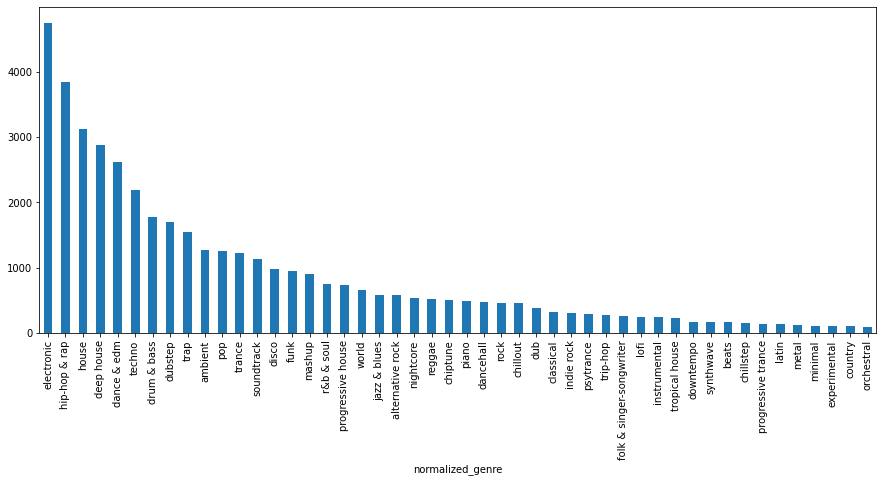

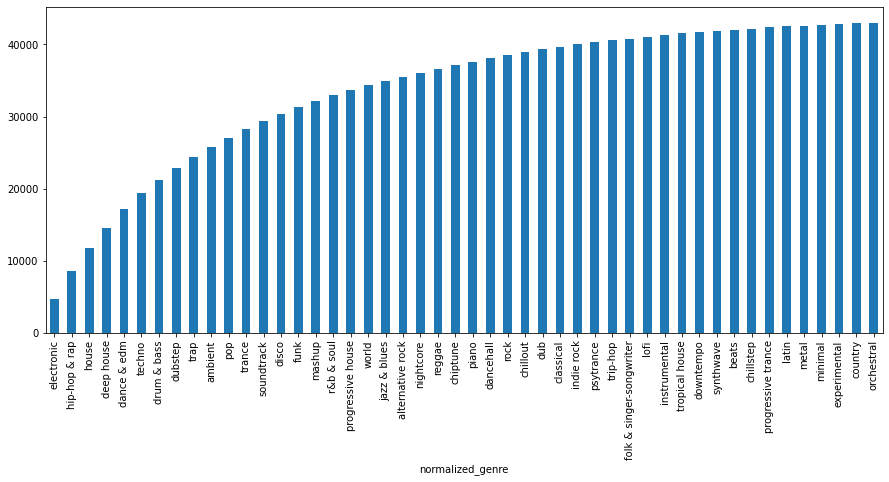

validation 48


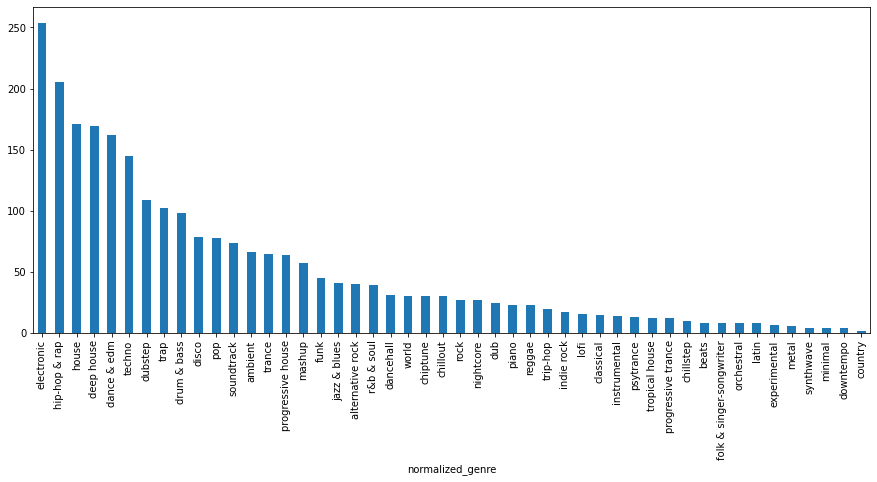

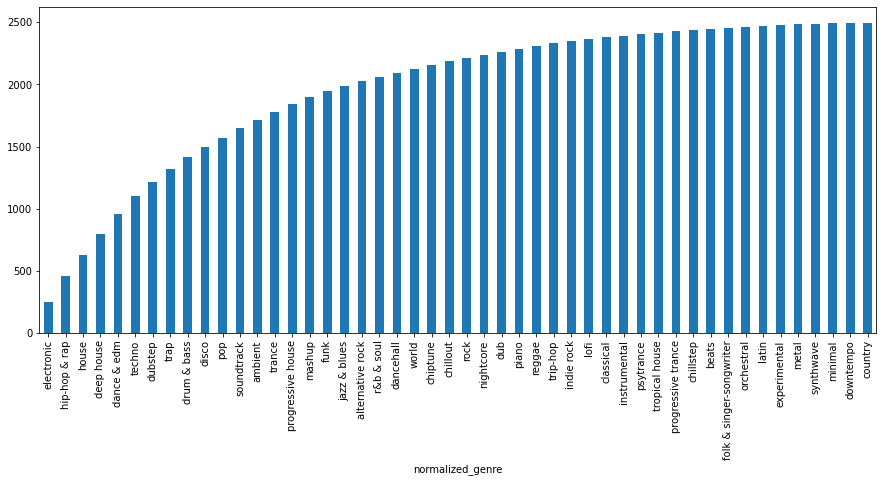

test 48


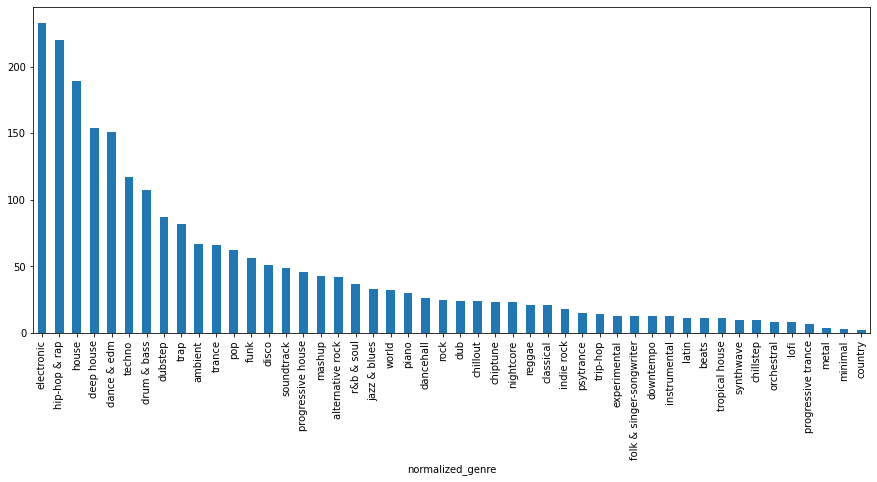

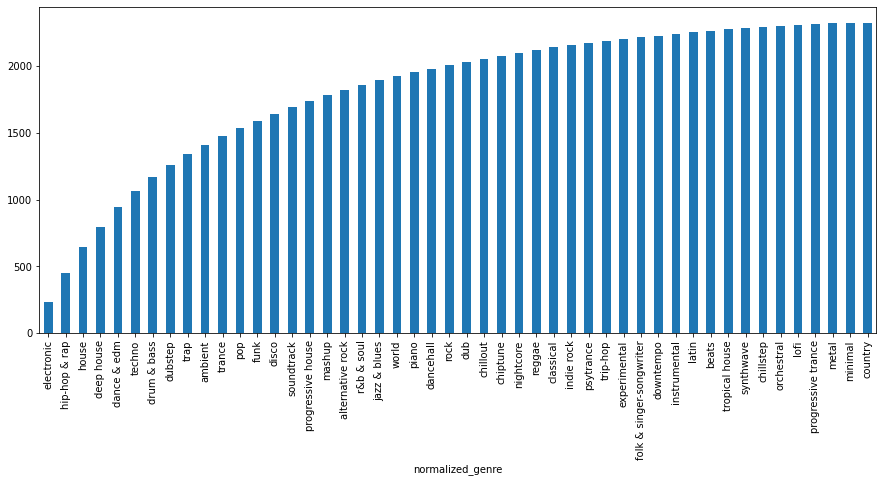

In [6]:
for split in ['training', 'validation', 'test']:
    genres = df[df['scdata_split'] == split] \
        .groupby('normalized_genre')['normalized_genre'] \
        .size() \
        .sort_values(ascending=False)
    print(split, len(genres))
    
    genres.plot.bar(figsize=(15,6))
    plt.show()
    
    genres.cumsum().plot.bar(figsize=(15,6))
    plt.show()